In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [2]:
filename1 = "C:/Données/data-science-stuff/euro_2024.csv" # replace for your own filename
df = pd.read_csv(filename1, encoding='latin', on_bad_lines='skip', sep = ";") # gets the file and saves it in "df1"
df_raw = pd.read_csv(filename1, encoding='latin', on_bad_lines='skip', sep = ";") # gets the file and saves it in "df1"

In [3]:
df

,za_nr,version,doi,year,resp_id,country,countrycode,country_alpha2,d3,d4,...,meta_end_date,meta_duration,meta_duration2,meta_consent,meta_mode,meta_vmobiledevice,Gen_by_age,Edu_rec,Weight1,Weight2
0,8868,1-0-0 (2024-11-04),doi:10.4232/1.14409,2024,560556,1,56,BE,2,1954,...,2024-06-17,1257,00:20:57,1,1,5,8,1,0.697848,0.734922
1,8868,1-0-0 (2024-11-04),doi:10.4232/1.14409,2024,560441,1,56,BE,2,1963,...,2024-06-16,1020,00:17:00,1,1,5,8,2,1.264243,1.338579
2,8868,1-0-0 (2024-11-04),doi:10.4232/1.14409,2024,560543,1,56,BE,1,1955,...,2024-06-17,893,00:14:53,1,1,5,4,3,0.671724,0.594819
3,8868,1-0-0 (2024-11-04),doi:10.4232/1.14409,2024,560161,1,56,BE,1,1963,...,2024-06-14,890,00:14:50,1,1,3,4,2,1.121143,1.191413
4,8868,1-0-0 (2024-11-04),doi:10.4232/1.14409,2024,560871,1,56,BE,2,1982,...,2024-06-18,1271,00:21:11,1,1,5,7,3,1.216125,1.117679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25899,8868,1-0-0 (2024-11-04),doi:10.4232/1.14409,2024,7521016,27,752,SE,2,1963,...,2024-06-24,709,00:11:49,1,1,3,8,2,1.406337,1.342382
25900,8868,1-0-0 (2024-11-04),doi:10.4232/1.14409,2024,7520797,27,752,SE,2,1992,...,2024-06-19,891,00:14:51,1,1,5,6,3,1.103413,1.064219
25901,8868,1-0-0 (2024-11-04),doi:10.4232/1.14409,2024,7520288,27,752,SE,1,1999,...,2024-06-17,1192,00:19:52,1,1,1,2,3,0.927830,0.901989
25902,8868,1-0-0 (2024-11-04),doi:10.4232/1.14409,2024,7520915,27,752,SE,1,1989,...,2024-06-21,720,00:12:00,1,1,5,2,1,0.819160,0.951742


In [6]:
df["d4_age"]

0        70
1        61
2        69
3        61
4        42
         ..
25899    61
25900    32
25901    25
25902    35
25903    24
Name: d4_age, Length: 25904, dtype: int64

In [7]:
vars = ["country_alpha2", "d8", "d2", "q2",  "q4", "q6", "q6n", "q9_3", "q9_6", "q9_5", "q12_1", "q12_2", "q12_3", "q12_4", "q12_5", "d3", "q17", "q13_6", "q13_8", "d9", "d4_age"]

In [8]:
df = df[vars]

In [9]:
df = df.loc[df["country_alpha2"] == "FR"]

In [10]:
df = df.drop("country_alpha2", axis = 1)

In [13]:
col_names = [
    "rural_urban",
    "education",
    "dem_satisfaction",
    "govt_approval",
    "vote_choice_EP",
    "vote_choice_EP_2",
    "vote_prop_lfi",
    "vote_prop_ps",
    "vote_prop_verts",
    "trade", 
    "redistrib", 
    "same_sex",
    "immigration",
    "climate",
    "gender", 
    "self_europe", 
    "politicians",
    "pro_ukraine",
    "religion",
    "age"
]

In [14]:
df.columns = col_names

In [17]:
df = df[df < 97]

In [19]:
df["vote_prop_lfi"].value_counts().sort_index()

vote_prop_lfi
0.0     533
1.0      54
2.0      34
3.0      39
4.0      24
5.0      65
6.0      34
7.0      45
8.0      31
9.0      37
10.0     59
Name: count, dtype: int64

In [20]:
df["vote_prop_ps"].value_counts().sort_index()

vote_prop_ps
0.0     344
1.0      69
2.0      58
3.0      57
4.0      50
5.0      99
6.0      57
7.0      56
8.0      61
9.0      36
10.0     59
Name: count, dtype: int64

In [21]:
df["vote_prop_verts"].value_counts().sort_index()

vote_prop_verts
0.0     391
1.0      60
2.0      64
3.0      63
4.0      51
5.0     100
6.0      58
7.0      51
8.0      58
9.0      24
10.0     32
Name: count, dtype: int64

In [ ]:
df["vote_prop_lfi"].corr(df["pro_ukraine"])

In [27]:
df.loc[:,"vote_lfi_pct"] = df["vote_prop_lfi"]*100
df.loc[:,"vote_ps_pct"] = df["vote_prop_ps"]*100
df.loc[:,"vote_verts_pct"] = df["vote_prop_verts"]*100
df


,rural_urban,education,dem_satisfaction,govt_approval,vote_choice_EP,vote_choice_EP_2,vote_prop_lfi,vote_prop_ps,vote_prop_verts,trade,...,climate,gender,self_europe,politicians,pro_ukraine,religion,age,vote_lfi_pct,vote_ps_pct,vote_verts_pct
9083,1,1.0,1.0,1.0,NaN,5.0,6.0,4.0,6.0,9.0,...,9.0,1,7.0,3.0,5.0,5,31,600.0,400.0,600.0
9084,1,3.0,3.0,2.0,96.0,96.0,0.0,0.0,0.0,10.0,...,5.0,1,NaN,5.0,NaN,10,61,0.0,0.0,0.0
9085,2,2.0,2.0,2.0,NaN,3.0,10.0,7.0,0.0,NaN,...,0.0,2,5.0,1.0,5.0,11,61,1000.0,700.0,0.0
9086,2,3.0,1.0,1.0,NaN,3.0,3.0,3.0,2.0,4.0,...,1.0,1,2.0,NaN,5.0,1,22,300.0,300.0,200.0
9087,3,5.0,3.0,2.0,NaN,3.0,10.0,8.0,5.0,7.0,...,3.0,2,2.0,5.0,2.0,10,49,1000.0,800.0,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10081,2,3.0,3.0,1.0,96.0,96.0,0.0,5.0,0.0,10.0,...,5.0,1,10.0,5.0,1.0,1,71,0.0,500.0,0.0
10082,2,2.0,3.0,1.0,NaN,90.0,4.0,4.0,4.0,4.0,...,4.0,2,3.0,3.0,3.0,1,66,400.0,400.0,400.0
10083,2,2.0,4.0,2.0,96.0,96.0,0.0,0.0,0.0,NaN,...,5.0,2,NaN,5.0,2.0,11,58,0.0,0.0,0.0
10084,1,1.0,3.0,2.0,NaN,1.0,4.0,3.0,2.0,6.0,...,0.0,1,0.0,2.0,3.0,11,39,400.0,300.0,200.0


In [ ]:
my_formula = "pro_ukraine  ~ vote_prop_lfi + vote_prop_ps + vote_prop_verts"
model = smf.ols(formula=my_formula, data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            pro_ukraine   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.03119
Date:                Fri, 23 Jan 2026   Prob (F-statistic):              0.860
Time:                        12:02:34   Log-Likelihood:                -1539.9
No. Observations:                 906   AIC:                             3084.
Df Residuals:                     904   BIC:                             3093.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.8103      0.054     51.601

In [47]:
df2 = df.copy()

In [62]:
df2["vote_prop_lfi"].describe()

count    955.000000
mean       2.460733
std        3.407551
min        0.000000
25%        0.000000
50%        0.000000
75%        5.000000
max       10.000000
Name: vote_prop_lfi, dtype: float64

In [86]:
df2["vote_prop_lfi_rec"] = 0

In [ ]:
mask = df2['lfi_vote_prop'] = 0 
df2['age_cat'] = 0
mask = df2['lfi_vote_prop'] = 0 
df2['age_cat'] = 0

In [ ]:
df2["vote_prop_lfi_rec"] = pd.cut(df2["vote_prop_lfi"], bins=[0, 3, 5, 8, 10], labels=["Jamais (0)", "Peu probable (1-3)", "Possible (4-7) ", "Probable"])


In [88]:
df2["vote_prop_lfi"].value_counts().sort_index()

vote_prop_lfi
0.0     533
1.0      54
2.0      34
3.0      39
4.0      24
5.0      65
6.0      34
7.0      45
8.0      31
9.0      37
10.0     59
Name: count, dtype: int64

In [89]:
df2["vote_prop_lfi_rec"].sort_index().value_counts()

vote_prop_lfi_rec
Jamais (0)            127
Possible              110
Probable               96
Peu probable (1-3)     89
Name: count, dtype: int64

In [66]:
df2["vote_prop_lfi_rec"].describe()

count            422
unique             4
top       Jamais (0)
freq             127
Name: vote_prop_lfi_rec, dtype: object

<Axes: xlabel='vote_prop_lfi_rec'>

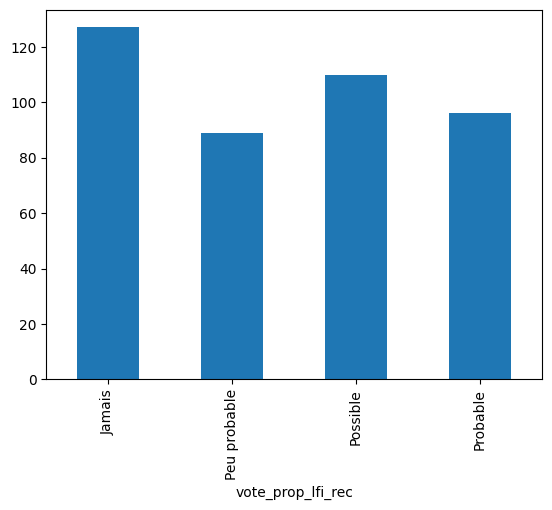

In [55]:
df2["vote_prop_lfi_rec"].value_counts().sort_index().plot(kind='bar')

In [54]:
df2

,rural_urban,education,dem_satisfaction,govt_approval,vote_choice_EP,vote_choice_EP_2,vote_prop_lfi,vote_prop_ps,vote_prop_verts,trade,...,gender,self_europe,politicians,pro_ukraine,religion,age,vote_lfi_pct,vote_ps_pct,vote_verts_pct,vote_prop_lfi_rec
9083,1,1.0,1.0,1.0,NaN,5.0,6.0,4.0,6.0,9.0,...,1,7.0,3.0,5.0,5,31,600.0,400.0,600.0,Possible
9084,1,3.0,3.0,2.0,96.0,96.0,0.0,0.0,0.0,10.0,...,1,NaN,5.0,NaN,10,61,0.0,0.0,0.0,NaN
9085,2,2.0,2.0,2.0,NaN,3.0,10.0,7.0,0.0,NaN,...,2,5.0,1.0,5.0,11,61,1000.0,700.0,0.0,Probable
9086,2,3.0,1.0,1.0,NaN,3.0,3.0,3.0,2.0,4.0,...,1,2.0,NaN,5.0,1,22,300.0,300.0,200.0,Jamais
9087,3,5.0,3.0,2.0,NaN,3.0,10.0,8.0,5.0,7.0,...,2,2.0,5.0,2.0,10,49,1000.0,800.0,500.0,Probable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10081,2,3.0,3.0,1.0,96.0,96.0,0.0,5.0,0.0,10.0,...,1,10.0,5.0,1.0,1,71,0.0,500.0,0.0,NaN
10082,2,2.0,3.0,1.0,NaN,90.0,4.0,4.0,4.0,4.0,...,2,3.0,3.0,3.0,1,66,400.0,400.0,400.0,Peu probable
10083,2,2.0,4.0,2.0,96.0,96.0,0.0,0.0,0.0,NaN,...,2,NaN,5.0,2.0,11,58,0.0,0.0,0.0,NaN
10084,1,1.0,3.0,2.0,NaN,1.0,4.0,3.0,2.0,6.0,...,1,0.0,2.0,3.0,11,39,400.0,300.0,200.0,Peu probable


In [ ]:
help(sm.graphics)

In [102]:
my_formula = "pro_ukraine  ~ vote_prop_lfi + vote_prop_ps + vote_prop_verts"
model = smf.ols(formula=my_formula, data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            pro_ukraine   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     33.36
Date:                Fri, 23 Jan 2026   Prob (F-statistic):           1.96e-20
Time:                        12:35:42   Log-Likelihood:                -1469.2
No. Observations:                 893   AIC:                             2946.
Df Residuals:                     889   BIC:                             2966.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.1608      0.062     

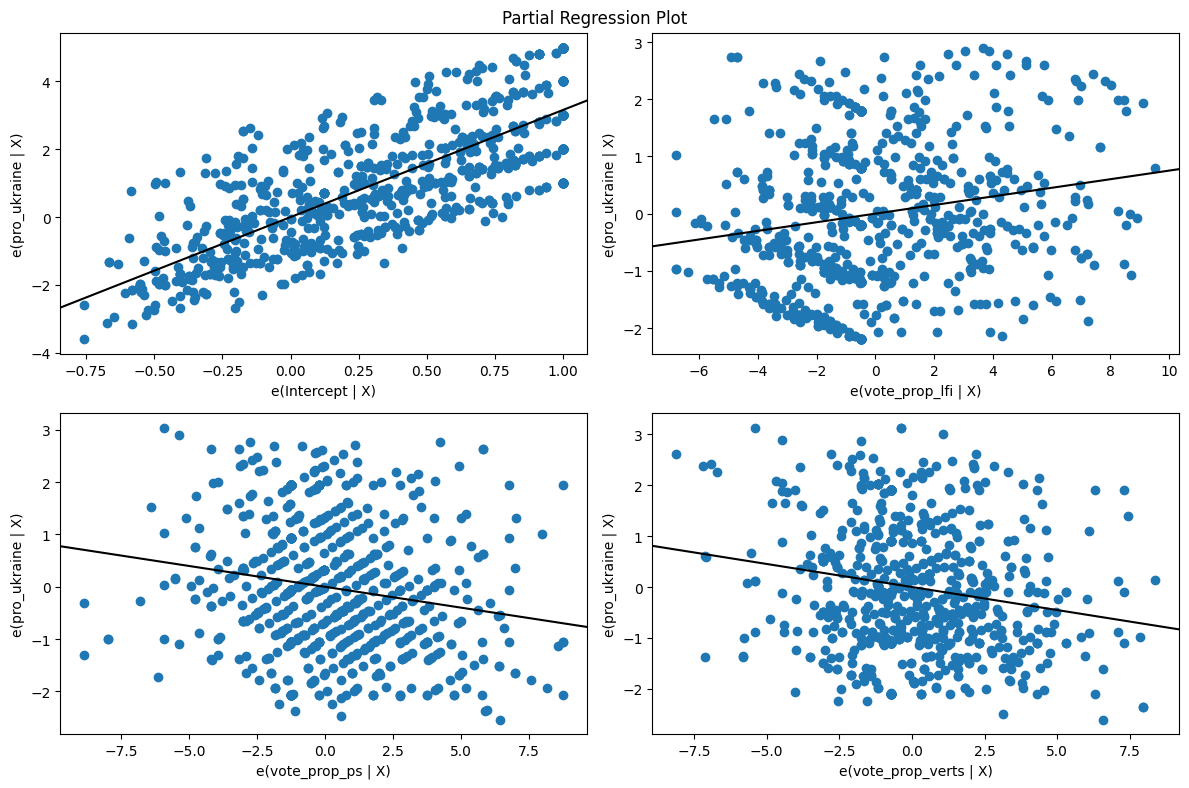

In [108]:
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('ukraine.png', bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [114]:
my_formula = "self_europe  ~ vote_prop_lfi + vote_prop_ps + vote_prop_verts"
model = smf.ols(formula=my_formula, data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            self_europe   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     45.17
Date:                Fri, 23 Jan 2026   Prob (F-statistic):           4.38e-27
Time:                        12:40:20   Log-Likelihood:                -2116.2
No. Observations:                 851   AIC:                             4240.
Df Residuals:                     847   BIC:                             4259.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.0419      0.150     

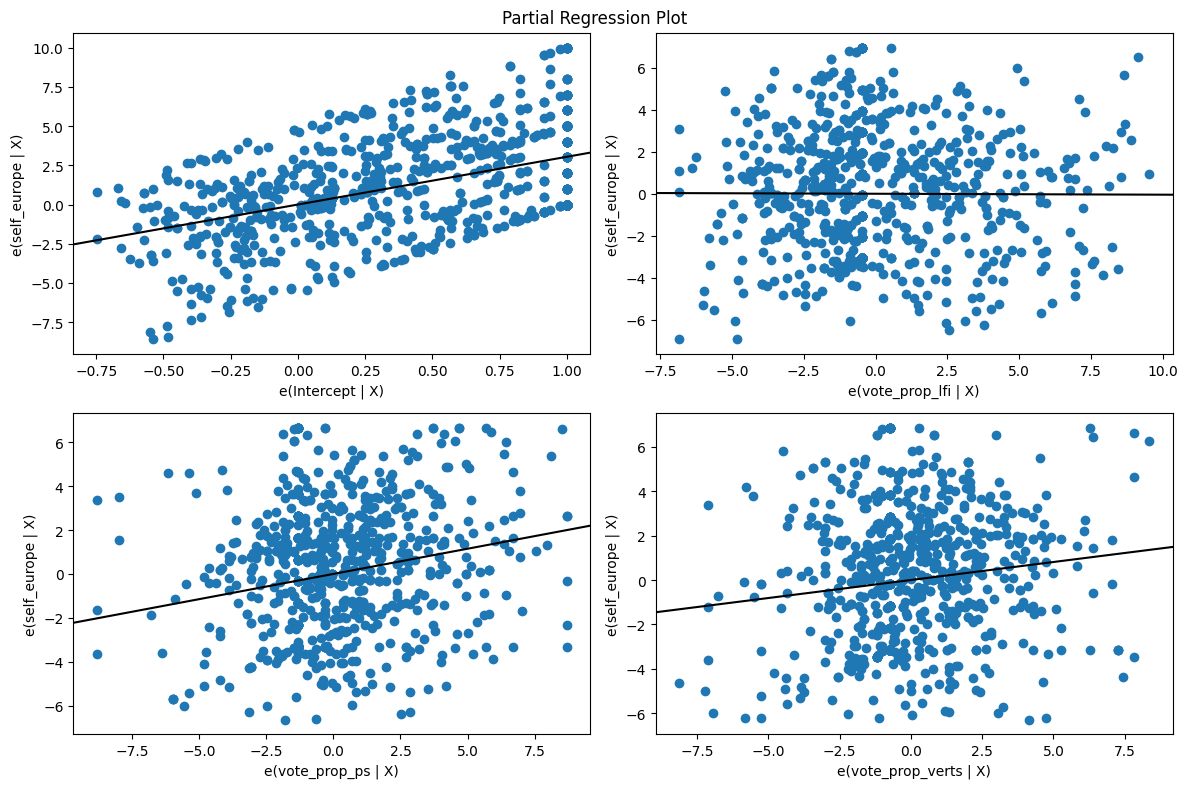

In [115]:
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('europe.png', bbox_inches='tight')


In [117]:
my_formula = "gender  ~ vote_prop_lfi + vote_prop_ps + vote_prop_verts"
model = smf.ols(formula=my_formula, data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 gender   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.431
Date:                Fri, 23 Jan 2026   Prob (F-statistic):             0.0166
Time:                        12:41:59   Log-Likelihood:                -675.80
No. Observations:                 939   AIC:                             1360.
Df Residuals:                     935   BIC:                             1379.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.5489      0.024     

In [ ]:
my_formula2 = "vote_int ~ age + ideology"
model = smf.logit(formula=my_formula, data=df).fit()

In [ ]:
fig= plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model_2, fig=fig)

In [ ]:
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)

In [ ]:
plt.figure()

In [ ]:
plt.hist(df_test[ax = "pro_ukraine"])
plt.show()

In [ ]:
df_test.plot.hist(alpha=0.5);

In [ ]:
vars_test = ["vote_prop_lfi", "vote_prop_ps", "vote_prop_verts"]

In [ ]:
df[vars_test].plot.kde()

In [ ]:
vars_test_2 = 

In [ ]:
pd.crosstab(df["vote_prop_lfi"], df["pro_ukraine"], normalize=True).plot(kind='bar', subplots=True);